In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import os
from PIL import Image
from torch.utils.data import Dataset
from pathlib import PosixPath
from typing import Union, Tuple, List, Sequence
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor, ToPILImage
from torch import Tensor
import numpy as np

In [3]:
from super_image_resolution import get_root_path
from super_image_resolution.utils import split
from super_image_resolution.datasets import CustomDataset
from super_image_resolution.transforms import CustomResize

In [4]:
PROJECT_PATH = get_root_path()
FACE_DATA_PATH = os.path.join("/", "scratch", "mittal.nit", "faces-spring-2020")
NUM_TRAIN_SAMPLES = .9

In [5]:
train, val = split(FACE_DATA_PATH, num_train=NUM_TRAIN_SAMPLES)

In [6]:
conv2d = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=1, padding_mode="zeros")
a = torch.randn(1,3,128,128)
conv2d(a).shape

torch.Size([1, 3, 128, 128])

In [7]:
in_transforms = Compose([
    CustomResize(size=32), 
    CustomResize(size=128), 
    ToTensor()])

out_transforms = Compose([Resize(size=128, interpolation=InterpolationMode.BICUBIC), ToTensor()])

In [8]:
face_dataset = CustomDataset(
    paths=train, in_transforms=in_transforms, out_transforms=out_transforms)

In [9]:
a, b = face_dataset.__getitem__(0)

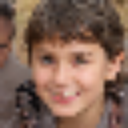

In [10]:
ToPILImage()(a)

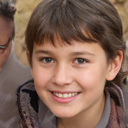

In [11]:
ToPILImage()(b)